# Car Dataset Analysis and Linear Regression 🚗
-------------------------------------------------

✏️ This project involves the analysis of a car dataset using Python and Pandas, focusing on exploring, cleaning, and modeling the data. The dataset contains information about various car features, including fuel economy (mpg), horsepower, acceleration, and more.

## Tasks 📝

### Step **1️⃣**: Read the dataset and examine how many features and examples does it have. 

This Python code utilizes the Pandas library to read a dataset from a CSV file. The dataset is loaded into a Pandas DataFrame named 'Dataframe'. Subsequently, the code retrieves and prints the number of examples (rows) and features (columns) in the dataset. 

In [1]:
import pandas as pd

# The path of dataset
file_path = 'cars.csv'

# Load the dataset into a Pandas DataFrame
Dataframe = pd.read_csv(file_path)

num_examples, num_features = Dataframe.shape
print(f"\n➡️ The dataset has {num_examples} examples and {num_features} features.")


➡️ The dataset has 398 examples and 8 features.


### Step **2️⃣**: Check for missing values ❎

This code calculates and prints the number of missing values for each feature in the dataset. It uses the isnull() function to identify missing values and sum() to count them for each feature. 

In [2]:
# Import the necessary libraries
import pandas as pd

# Check for missing values in the DataFrame
missing_values = Dataframe.isnull().sum()

# Print the missing values
print(f"\nMissing values:⤵️\n{missing_values}")


Missing values:⤵️
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


### Step **3️⃣**: Fill missing values using a proper imputation method. ✅

This code performs imputation to fill missing values in both numeric and non-numeric columns using the SimpleImputer from scikit-learn.

1. It separates the columns into numeric and non-numeric (categorical) columns using the **select_dtypes** function.
2. The **SimpleImputer** is used with the strategy 'most_frequent' for numeric columns to fill missing values with the most_frequent of each column.
3. For non-numeric columns, the strategy 'most_frequent' is used to fill missing values with the most frequent value (mode) of each column.
4. The imputed values are then assigned back to the respective columns in the DataFrame.

In [3]:
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Separate numeric and non-numeric columns
numeric_columns = Dataframe.select_dtypes(include='number').columns
non_numeric_columns = Dataframe.select_dtypes(exclude='number').columns

# Fill missing values for columns using the most frequent value (mode)
numeric_imputer = SimpleImputer(strategy='most_frequent')
Dataframe[numeric_columns] = numeric_imputer.fit_transform(Dataframe[numeric_columns])

non_numeric_imputer = SimpleImputer(strategy='most_frequent')
Dataframe[non_numeric_columns] = non_numeric_imputer.fit_transform(Dataframe[non_numeric_columns])

print("Missing values after imputation:⤵️")
print(Dataframe.isnull().sum())

# Check for sparse dtype
if not hasattr(Dataframe, "sparse") and Dataframe.dtypes.apply(lambda x: isinstance(x, pd.SparseDtype)).any():
    print("Sparse data type detected.")


Missing values after imputation:⤵️
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### Step **4️⃣**: Box plot for fuel economy by country. 📊

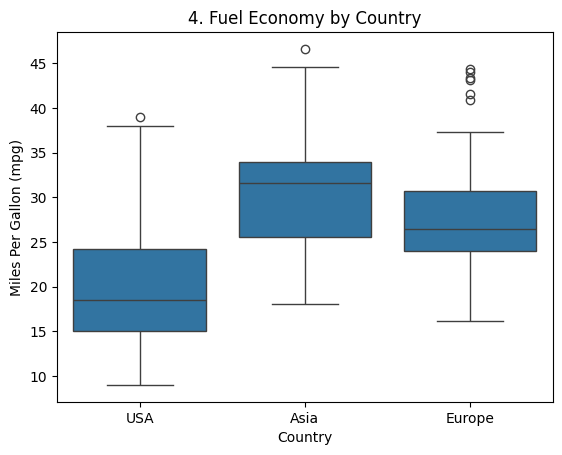

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='origin', y='mpg', data=Dataframe)
plt.title('4. Fuel Economy by Country')
plt.xlabel('Country')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()


### Step **5️⃣**: Histograms for each feature. **📊**

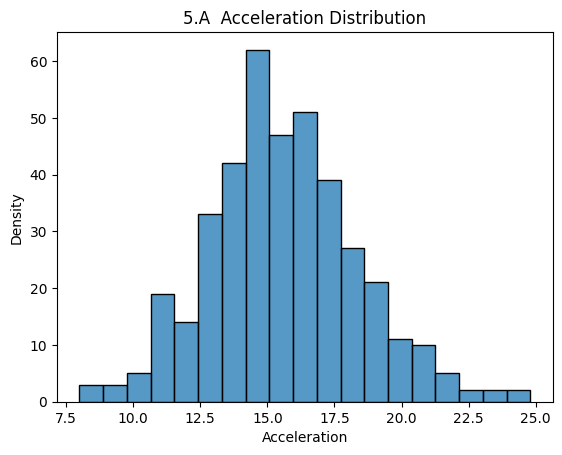

In [5]:
sns.histplot(Dataframe['acceleration'])
plt.title('5.A  Acceleration Distribution')
plt.xlabel('Acceleration')
plt.ylabel('Density')
plt.show()

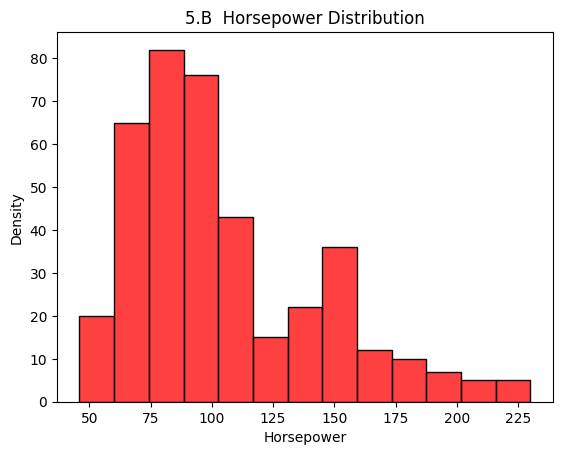

In [6]:
sns.histplot(Dataframe['horsepower'], color = 'red')
plt.title('5.B  Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Density')
plt.show()

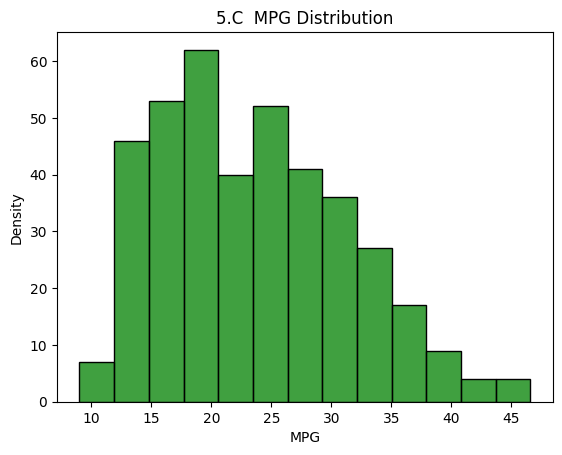

In [7]:
sns.histplot(Dataframe['mpg'], color = 'green')
plt.title('5.C  MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Density')
plt.show()

### Step **6️⃣**: Quantitative measure for similarity to Gaussian. 📉

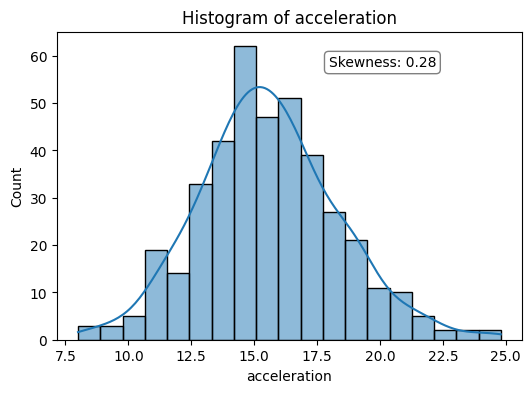

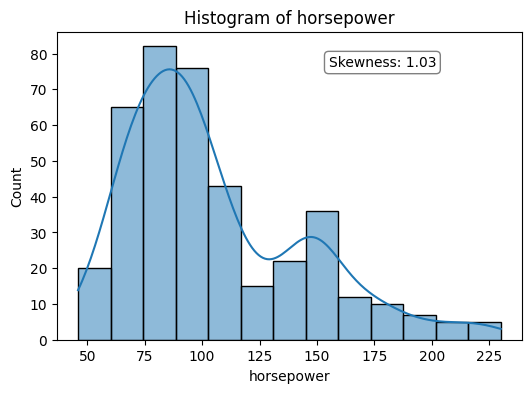

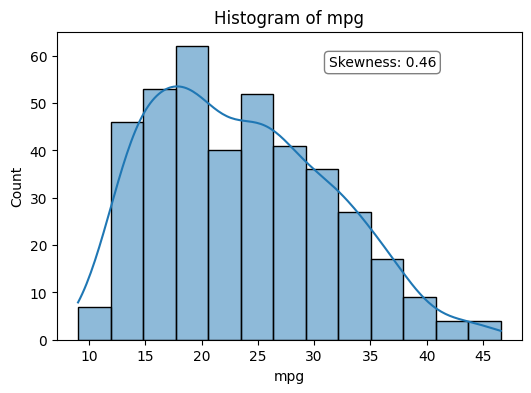

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

features = ['acceleration', 'horsepower', 'mpg']

# Assuming 'features' is a list of the features you want to analyze
for feature in features:
    # Plot histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(Dataframe[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Calculate skewness
    skewness = skew(Dataframe[feature])
    
    # Annotate skewness on the plot
    plt.annotate(f'Skewness: {skewness:.2f}', 
                 
                 xy=(0.7, 0.9),
                 xycoords='axes fraction', 
                 ha='center', 
                 va='center',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'), fontsize=10)
    
    plt.show()


The output involves conducting a quantitative analysis to determine which feature among 'acceleration,' 'horsepower,' or 'mpg' has a distribution most similar to a Gaussian (normal) distribution. This is assessed using the **skewness measure**, which quantifies the asymmetry of a distribution.

The skewness measure indicates the extent and direction of skew (departure from horizontal symmetry) in the dataset. A skewness value of 0 suggests a perfectly symmetrical distribution, while positive or negative values indicate skew to the right or left, respectively.

As we see the **'acceleration'** is less value of them, it indicates that the distribution of 'acceleration' is closer to a Gaussian (normal) distribution. In this case, the feature 'acceleration' is considered to have a distribution that is more symmetric and bell-shaped, resembling a typical Gaussian distribution.

### Step **7️⃣**: Scatter plot for 'horsepower' vs 'mpg'. 

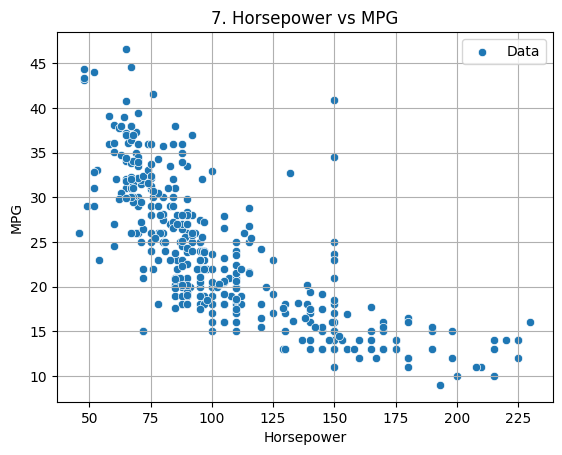

In [9]:

# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#  Creating a scatter plot 
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)

# Setting the title of the plot
plt.title('7. Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid()
plt.legend(['Data'])
plt.show()


### Step **8️⃣**: Closed form solution of linear regression. 📈

➡️ [-0.15250438 39.55128981]


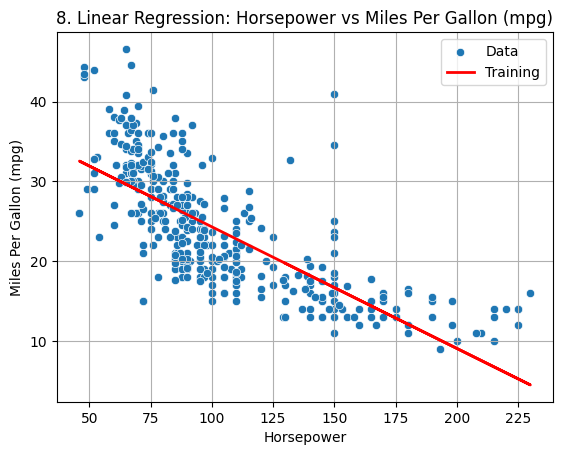

In [10]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns
X_linear = Dataframe[['horsepower']].copy()
X_linear['x0'] = 1
y_linear = Dataframe['mpg'].copy()

# Use the closed form solution for linear regression
w_linear = np.linalg.inv(X_linear.T.dot(X_linear)).dot(X_linear.T).dot(y_linear)
print('➡️',w_linear)
# Scatter plot
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('8. Linear Regression: Horsepower vs Miles Per Gallon (mpg)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')

# Plotting the regression line
plt.plot(X_linear['horsepower'], X_linear.dot(w_linear), color='red', linewidth=2)
plt.grid()
plt.legend(['Data','Training'])
plt.show()


### Step **9️⃣**: Quadratic regression using the closed-form solution.

**Quadratic regression** introduces a quadratic function of the form:

 <font size="5" color='blue'>ƒ = W₀ + W₁X + W₂X²</font>


In this section, i apply quadratic regression to predict 'miles per gallon' (mpg) based on the 'horsepower' feature in the dataset. The quadratic function introduces a curve to capture potentially **non-linear** patterns in the data.

The steps involve preparing the data, implementing the quadratic regression model, and visualizing the results through a scatter plot with the original data points and the learned quadratic regression curve. This analysis aims to provide insights into whether a quadratic relationship better represents the underlying structure of the 'horsepower' and 'mpg' variables compared to a linear model.


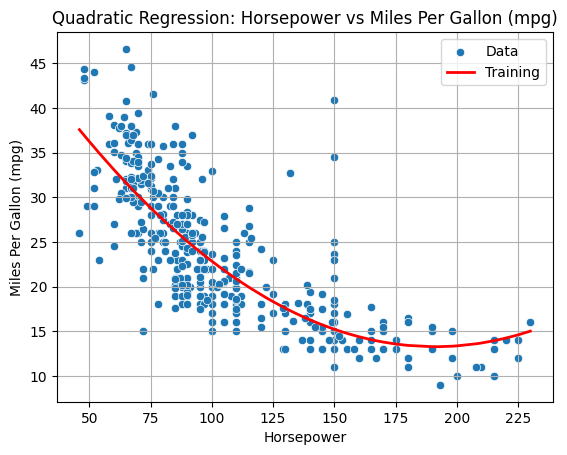

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_quadra = Dataframe[['horsepower']].copy()
X_quadra['x0'] = 1
X_quadra['x2'] = X_quadra['horsepower'] ** 2
y_quadratic = Dataframe['mpg'].copy()

# Use the closed form solution for quadratic regression
w_quadratic = np.linalg.inv(X_quadra.T.dot(X_quadra)).dot(X_quadra.T).dot(y_quadratic)

# Scatter plot
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('Quadratic Regression: Horsepower vs Miles Per Gallon (mpg)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')

# Plotting the regression line using .loc
Dataframe.sort_values(by='horsepower', inplace=True)
Dataframe['quadratic_line'] = X_quadra.dot(w_quadratic)
plt.plot(Dataframe['horsepower'], Dataframe['quadratic_line'], color='red', linewidth=2)
plt.legend(['Data','Training'])
plt.grid()
plt.show()

### Step 🔟: Gradient descent algorithm 📈

**Gradient descent** is a fundamental optimization algorithm used in machine learning to minimize a cost function iteratively. The primary objective is to find the optimal parameters for a model that minimize the difference between predicted and actual outcomes. It works by calculating the gradient, or the rate of change, of the cost function concerning each model parameter. The algorithm then adjusts these parameters in the opposite direction of the gradient, seeking the steepest decrease in the cost function. This iterative process continues until the algorithm converges to a minimum, effectively optimizing the model for better performance and accuracy in making predictions. In essence, gradient descent efficiently navigates the parameter space to find the most favorable configuration for a given machine learning model.

The provided code starts with data preprocessing, checking for NaN or infinite values, and normalizing numerical data in a DataFrame. The linear regression focuses on predicting 'mpg' based on 'horsepower.' The gradient descent function iteratively updates model weights to minimize the mean squared error. The script visualizes the results with a scatter plot of 'horsepower' against 'mpg' and overlays a regression line representing model predictions. Overall, the code demonstrates a concise yet comprehensive application of linear regression, incorporating key elements like data preprocessing and visualization.

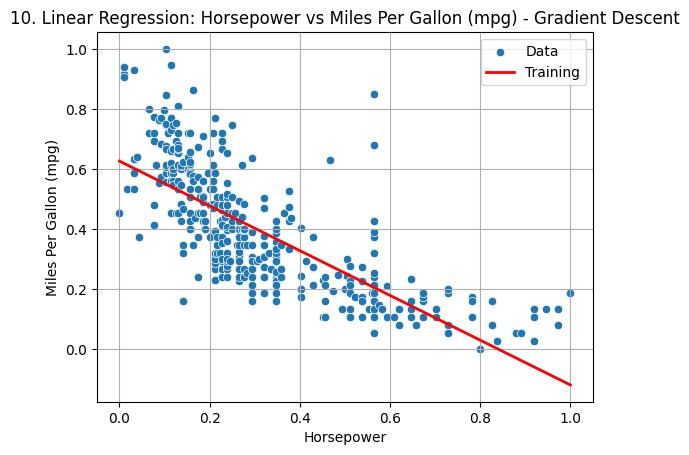

In [12]:

def gradient_descent(X, y, w, alpha, iterations): # 
    for i in range(iterations): 
        w = w - alpha * (1 * X.T.dot(X.dot(w) - y) / len(y) ) # Update w using the gradient and the learning rate 
    return w

 # Additional preprocessing steps to check for NaN or infinite values and normalize data
for column in Dataframe.columns:
    column_data = Dataframe[column].values  # Convert column to NumPy array
    if column != 'origin' and (np.any(np.isnan(column_data.astype(float))) or np.any(np.isinf(column_data.astype(float)))):
        print(f'Warning: NaN or infinite values detected in column {column}.')
    elif column != 'origin':
        # Normalize the data
        Dataframe[column] = (Dataframe[column] - np.min(column_data)) / (np.max(column_data) - np.min(column_data))

# Prepare data for linear regression
X_linear = Dataframe[['horsepower']].copy()
X_linear['x0'] = 1
y_linear = Dataframe['mpg'].copy()

# Initial parameters
weight_initial = np.zeros(X_linear.shape[1])


learning_rate = 0.1
iterations = 15000

# Run gradient descent
weight_final = gradient_descent(X_linear, y_linear, weight_initial, learning_rate, iterations)

# Scatter plot
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('10. Linear Regression: Horsepower vs Miles Per Gallon (mpg) - Gradient Descent')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')

# Plotting the regression line
plt.plot(X_linear['horsepower'], X_linear.dot(weight_final), color='red', linewidth=2)
plt.grid()
plt.legend(['Data','Training'])
plt.show()



The provided code successfully applies the **gradient descent** algorithm for linear regression on the 'cars.csv' dataset, predicting 'mpg' based on 'horsepower.' The resulting scatter plot demonstrates the learned linear regression line, showcasing the model's ability to capture the relationship between the variables. Further refinements and evaluations could enhance the model's performance, but the current implementation serves as a fundamental example of linear regression using gradient descent.




**👋 In conclusion**, the project provided a comprehensive overview of data preprocessing, exploratory analysis, and the application of linear regression techniques, offering valuable insights into the world of predictive modeling and machine learning.

Linear regression models, both simple and quadratic, were implemented using closed-form solutions and gradient descent algorithms. The code addressed warnings and potential issues, providing a clear understanding of each step. The analysis culminated in a thorough investigation of linear regression using gradient descent, emphasizing the importance of preprocessing and understanding the impact of hyperparameters.

